<h1> 2. Exploratory Data Analysis</h1>

<p><b>2.0</b> Reading the data from the csv file and importing some necessary packages. </p>

In [3]:
import pandas as pd
import os
india_data = pd.read_csv("reddit_india_data.csv")

<p><b>2.1</b> Understanding the dataset overall in terms of the size and data columns while veryfying if there are any null values. <br>
If null values exist that are relevant to the classification, then there would be a need for a function to remove these or add values depending on the dataset as null values adversely affect the performance and accuracy of any machine learning algorithm. 
<br><br>
We also store a list of all the unique flair values into flairs. [Note: While collecting the data, even on multiple attempts are trying different methods, the flair 'Science/Technology' interrupted the code every time. I had to go with excluding that particular flair out of my dataset.]</p>

In [4]:
print("\nInfo: \n")
india_data.info()

print("\nFlairs present in the dataset: \n")
flairs = india_data.flair.unique()
print(flairs)


Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   flair         1000 non-null   object
 1   title         1000 non-null   object
 2   url           1000 non-null   object
 3   body          543 non-null    object
 4   num_comments  1000 non-null   int64 
 5   comments      899 non-null    object
 6   score         1000 non-null   int64 
 7   id            1000 non-null   object
dtypes: int64(2), object(6)
memory usage: 62.6+ KB

Flairs present in the dataset: 

['Non-Political' 'Scheduled' 'Photography' 'Politics' 'Business/Finance'
 'Policy/Economy' 'Sports' 'Food' 'AskIndia' 'Coronavirus']


<p><b>2.2</b> Printing first ten and last ten values to acquire an understanding of what values the data columns actually represent. </p>

In [5]:
india_data.head(10)

,flair,title,url,body,num_comments,comments,score,id
0,Non-Political,Indian States / UTs if renamed for countries w...,https://i.redd.it/hk9o11b8dun41.png,NaN,20,nice name for Uttar Pradesh. Ajay Bisht is go...,186,flwd7r
1,Non-Political,Hotstar finally uploads Sunday’s “Last Week To...,https://www.hotstar.com/in/tv/last-week-tonigh...,NaN,12,First turning off the internet of an entire s...,162,fgb1k3
2,Non-Political,ICSE and ISC exams have been postponed due to ...,https://cisce.org//UploadedFiles/PDF/COVID%201...,NaN,0,NaN,6,fl4viz
3,Non-Political,"[Non-Political]Friend wrote his first book, th...",https://www.reddit.com/r/india/comments/ezqw6i...,"A friend of mine wrote his first book ""Music M...",0,NaN,13,ezqw6i
4,Non-Political,[Non-Political] Wild Karnataka - David Attenbo...,https://youtu.be/gHSVLd4Ao60,NaN,1,Is this real? Did David Attenborough voice a ...,22,ejetgt
5,Non-Political,[Non-Political] Today the Zoroastrian communit...,https://imgur.com/XY4daDc,NaN,17,Happy Navroz to all dikras and dikris Wow and...,366,crifi9
6,Non-Political,[Non-Political] This newspaper is 50 year old ...,https://imgur.com/lfOyub8,NaN,13,"""Bankon ka rashtiyakaran janata ke hit mein"" ...",115,cfeur8
7,Non-Political,"Prime Time With Ravish Kumar, April 24, 2019 |...",https://www.youtube.com/watch?v=vCmZlob-PIo,NaN,73,"""Modi ji... kuch fakeeri si hai aapme"" *Arnab...",442,bh4wzu
8,Non-Political,"[Non-Political] Dear Bangalore, I see your gra...",http://i.imgur.com/CZoN8aX.jpg,NaN,13,Nobody :\n\nRandom graffiti artist : I'm a ph...,100,bx5zig
9,Non-Political,[Non-political] What's the deal with this new ...,https://i.redd.it/ai1o7jd2yor21.png,NaN,37,Door Darshan (Far-Sightedness) did it first. ...,691,bc4f9j


In [4]:
india_data.tail(10)

,flair,title,url,body,num_comments,comments,score,id
990,Coronavirus,People who test negative might also have coron...,https://www.reddit.com/r/india/comments/fywlyr...,>scientists have warned about a growing concer...,3,Almost every medical test has a slight probab...,43,fywlyr
991,Coronavirus,Coronavirus: Rajasthan extends lockdown till A...,https://scroll.in/latest/958872/coronavirus-ra...,NaN,0,NaN,56,fyv71k
992,Coronavirus,Covid-19: How can we help?,https://www.reddit.com/r/india/comments/g19u70...,A lot of us are not in a position to physicall...,1,NaN,5,g19u70
993,Coronavirus,India’s Hindu Nationalists Are Inciting Hate B...,https://www.vice.com/en_us/article/akwmyj/indi...,NaN,40,I wish they stopeed using Hindu Nationalists ...,134,fyp7jr
994,Coronavirus,"Aggressive testing, contact tracing, cooked me...",https://www.washingtonpost.com/world/aggressiv...,NaN,5,Kerala currently looks like the light they ta...,155,fykkxc
995,Coronavirus,Coronavirus: Has India's Yamuna River gotten c...,https://gulfnews.com/world/asia/india/coronavi...,NaN,1,NaN,1,fze76u
996,Coronavirus,"Coronavirus Outbreak: Hum Paanch, popular come...",https://www.firstpost.com/health/coronavirus-o...,NaN,0,NaN,9,fz1fna
997,Coronavirus,'Please Don’t Forget the North East Delhi Viol...,https://thewire.in/rights/north-east-delhi-vio...,NaN,1,>On how “communalism had devastated people in...,5,fz20yc
998,Coronavirus,Coronavirus: The children struggling to surviv...,https://www.bbc.com/news/world-asia-india-5221...,NaN,1,Reality of our country is fucking brutal man.,11,fz1dl4
999,Coronavirus,Was the previous major catastrophe for India t...,https://www.reddit.com/r/india/comments/g11d83...,Was the previous major catastrophe for India t...,8,"Not pan India, but region wise '04 Earthquake...",6,g11d83


<p><b>2.3 </b> The task can be efficiently done by considering title, body, url and comments. Therefore how these values are stored and what their types are, is important. </p>

<p>Printing all comments </p>

In [10]:
print("All comments: \n", india_data['comments'])

All comments: 
 0       nice name for Uttar Pradesh. Ajay Bisht is go...
1       First turning off the internet of an entire s...
2                                                    NaN
3                                                    NaN
4       Is this real? Did David Attenborough voice a ...
                             ...                        
995                                                  NaN
996                                                  NaN
997     >On how “communalism had devastated people in...
998        Reality of our country is fucking brutal man.
999     Not pan India, but region wise '04 Earthquake...
Name: comments, Length: 1000, dtype: object


<p>Printing comments under first post </p>

In [ ]:
print("\nComments on first post: \n", india_data['comments'][0])

<p>Checking how the comments are stored together for each post </p>

In [ ]:
print("\nType: ", type(india_data['comments']))

<p><b>2.4</b> Using matplotlib here, we are plotting the 'flair' against the 'number of occurrences' of the flair in our dataset to see if there is variation in how much data is present for each flair. In this case, while collecting data, it was ensured that an equal amount of data for each flair was collected and the dataset is hence, very balanced. </p> 

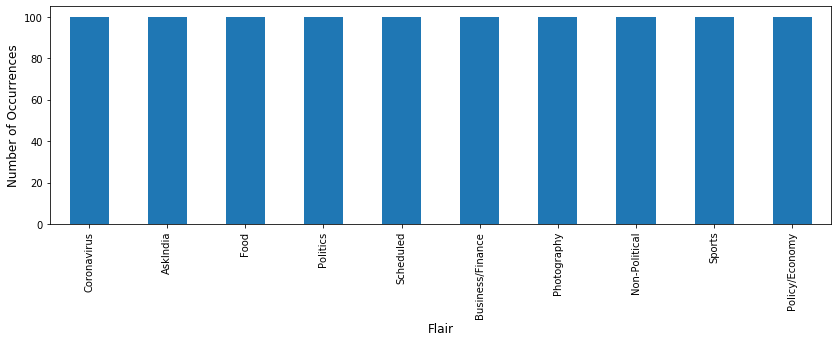

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Flair', fontsize=12)
india_data.flair.value_counts().plot(kind='bar');